  0%|          | 0/130 [00:00<?, ?it/s]

100%|██████████| 130/130 [00:00<00:00, 1469.42it/s]


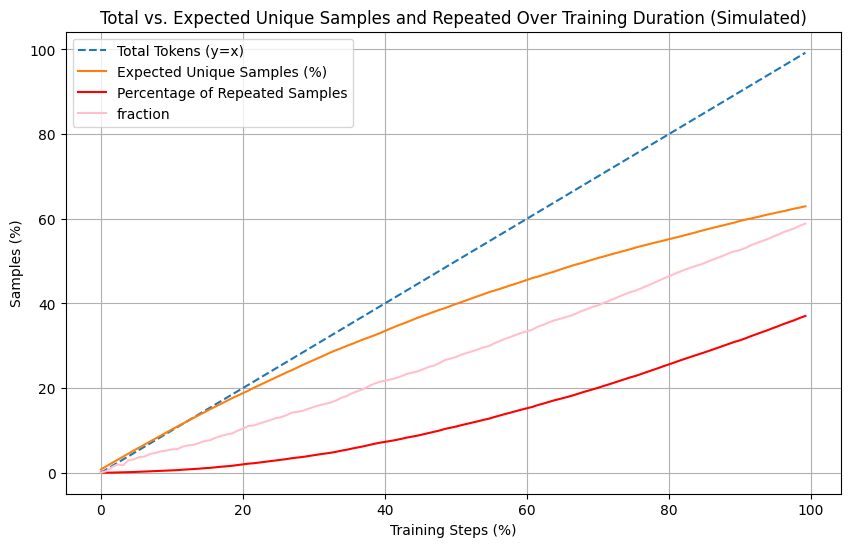

Training steps to reach 0.1% repetitions: 5 steps
Training steps to reach 1% repetitions: 19 steps
Training steps to reach 10% repetitions: 63 steps
50% repetitions not reached within the training duration


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def simulate_sampling(dataset_size, num_samples, steps_per_iteration=1, simulations=1000):
    # Store results across multiple simulations
    unique_samples_fraction = np.zeros(num_samples)
    repeated_samples_fraction = np.zeros(num_samples)

    for _ in tqdm(range(simulations)):
        seen_examples = set()  # Track examples seen so far
        unique_count = []
        repeated_count = []

        for step in range(num_samples):
            # Sample an example randomly with replacement
            sample = np.random.randint(0, dataset_size)

            # Check if it’s a new or repeated example
            if sample not in seen_examples:
                seen_examples.add(sample)
            
            # Calculate unique and repeated counts as fractions
            unique_fraction = len(seen_examples) / dataset_size
            repeated_fraction = (step + 1 - len(seen_examples)) / dataset_size
            
            unique_count.append(unique_fraction)
            repeated_count.append(repeated_fraction)

        # Aggregate the results for each simulation
        unique_samples_fraction += np.array(unique_count)
        repeated_samples_fraction += np.array(repeated_count)

    # Average results across simulations
    unique_samples_fraction /= simulations
    repeated_samples_fraction /= simulations

    # Total samples (y = x)
    total_samples = np.arange(num_samples) / num_samples

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(total_samples * 100, total_samples * 100, label="Total Tokens (y=x)", linestyle='--')
    plt.plot(total_samples * 100, unique_samples_fraction * 100, label="Expected Unique Samples (%)")
    plt.plot(total_samples * 100, repeated_samples_fraction * 100, label="Percentage of Repeated Samples", color='red')
    plt.plot(total_samples * 100, (repeated_samples_fraction/unique_samples_fraction) * 100, label="fraction", color='pink')
    
    plt.xlabel("Training Steps (%)")
    plt.ylabel("Samples (%)")
    plt.title("Total vs. Expected Unique Samples and Repeated Over Training Duration (Simulated)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Milestones for % of repetitions
    milestones = [0.1, 1, 10, 50]  # Target percentages of repetitions
    for milestone in milestones:
        # Find the step where repetitions as a percentage reaches the milestone
        steps_to_reach = np.argmax(repeated_samples_fraction * 100 >= milestone)
        if steps_to_reach > 0:
            print(f"Training steps to reach {milestone}% repetitions: {steps_to_reach * steps_per_iteration} steps")
        else:
            print(f"{milestone}% repetitions not reached within the training duration")

# Example usage
dataset_size = 130   # Number of examples in your dataset
num_samples = 130    # Number of training steps
steps_per_iteration = 1  # Custom iteration step
simulations = 130    # Number of simulations for averaging

simulate_sampling(dataset_size, num_samples, steps_per_iteration, simulations)
